<a href="https://colab.research.google.com/github/phuongnguyen99/TwoLayers_Neural_Network/blob/main/FNN_using_Sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following python implementation of a two layer FNN 
Step-by-step develop a two layer FNN: \
- Input layer (I): two neurons and one bias neuron, that is $I_1$ and $B_1=1$
- Hidden layer (H): two neurons and one bias neuron, that is $H_1$, $H_2$ and $B_2=1$
- Output layer (O): one neuron, that is $O_1$

We need three weights $w_1$, $w_2$ and $w_3$ from layer H to layer O, no activation function; <br />
We need four weights $w_4,\dots, w_7$ from layer I to layer H, and we use the activation function via sigmoid $\sigma(x)=\frac{1}{1+\exp{(-x)}}$ the derivative is $\sigma'(x)=\frac{\exp(-x)}{\big(1+\exp(-x)\big)^2}$.

In summary, we expect the output layer to be
$$
\begin{split}
O=&H_1\times w_1 +H_2\times w_2+ B_2\times w_3 \\
=& \sigma\big(I_1\times w_4+B_1\times w_5\big)\times w_1+\sigma\big(I_1\times w_6+B_1\times w_7\big)\times w_2+B_2\times w_3.
\end{split}
$$
Let us use the residue sum of squares (RSS) as the cost function to measure the difference between trained O and observed $\widehat{O}$.
$$
\begin{split}
\text{RSS}&=\frac{1}{2\times \text{sample size}}\|O-\widehat{O}\|_2^2=\frac{1}{2}(O-\widehat{O})\cdot (O-\widehat{O})\\
&= \frac{1}{2}\big(\sigma\big(I_1\times w_4+B_1\times w_5\big)\times w_1+\sigma\big(I_1\times w_6+B_1\times w_7\big)\times w_2+B_2\times w_3-\widehat{O}\big)\\
&\qquad \quad \cdot \big(\sigma\big(I_1\times w_4+B_1\times w_5\big)\times w_1+\sigma\big(I_1\times w_6+B_1\times w_7\big)\times w_2+B_2\times w_3-\widehat{O}\big)/\text{sample size}.
\end{split}
$$
Now, let's compute the derivative of RSS with respect to each weight. 
- From layer H to layer O, we define residual (R) to be
$$
R:=\sigma\big(I_1\times w_4+B_1\times w_5\big)\times w_1+\sigma\big(I_1\times w_6+B_1\times w_7\big)\times w_2+B_2\times w_3-\widehat{O},
$$
$$
\frac{\partial \text{RSS}}{\partial w_1}= R\times \sigma\big(I_1\times w_4+B_1\times w_5\big)/\text{sample size},
$$
and
$$
\frac{\partial \text{RSS}}{\partial w_2}= R\times\sigma\big(I_1\times w_6+B_1\times w_7\big)/\text{sample size},
$$
and $\frac{\partial \text{RSS}}{\partial w_3}=R\times B_2/\text{sample size}$.
- From layer I to layer H
$$
\frac{\partial \text{RSS}}{\partial w_4}= R\times w_1\times \sigma'\big(I_1\times w_4+B_1\times w_5\big)\times I_1/\text{sample size},
$$
and
$$
\frac{\partial \text{RSS}}{\partial w_5}= R\times w_1 \times \sigma'\big(I_1\times w_4+B_1\times w_5\big)\times B_1/\text{sample size},
$$
and 
$$
\frac{\partial \text{RSS}}{\partial w_6}= R\times w_2\times \sigma'\big(I_1\times w_6+B_1\times w_7\big)\times I_1/\text{sample size},
$$
and
$$
\frac{\partial \text{RSS}}{\partial w_7}= R\times w_2 \times \sigma'\big(I_1\times w_6+B_1\times w_7\big)\times B_1/\text{sample size}.
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid_function(x):
  y = 1/(1+ np.exp(-x))
  return y 

In [ ]:
#implement derivative of sigmoid function 
def sigmoid_derivative(x):
  dy = np.exp(-x)/(1+np.exp(-x))**2
  return dy

In [ ]:
# implement FNN
# (x, y) input data
# lr: learning rate
def two_layer(x,y,lr):
# This function use Gradient descent with fixed learning rate to train the two layer
# feedforward neural network: 
  max_ite = 200000
  tolerance = 0.001
# Initialize the weights W by all zeros entries
  W = np.zeros(7)
  # W0 = W
  B1 = np.ones_like(x) # bias node at the input layer 
  B2 = np.ones_like(x) # bias node at the hidden layer
  H1 = np.zeros_like(x)
  H2 = np.zeros_like(x)

  ite = 0 
  loss = 1
  out, H1, H1_tidle, H2, H2_tidle, R, loss = forward_computation(x,y,W)

# Apply Gradient descent with fixed learning rate
  while ite <= max_ite and loss>tolerance:

    # Do the backward propogation to update the weights W
    grad_W = backward_computation(x,y,W,B1,B2,H1, H1_tidle, H2, H2_tidle, R)
    W = W- grad_W*lr
  

    # Do the forward propogation to update the FNN and lost function 
    out, H1, H1_tidle, H2, H2_tidle, R, loss = forward_computation(x,y,W)
  
    # Every 100 iteration steps, print ite and loss values
    if ite %100 == 0:
       print(ite,':and' ,loss)
    ite += 1
  

  return out, loss, W, ite



In [ ]:
 def  forward_computation(x,y,W):
   # This function update the values of FNN
      # W = np.ones(7)
      b1 = np.ones_like(x)
      b2 = np.ones_like(x)
      H1 = x*W[3]+ b1*W[4]
      H1_tidle = sigmoid_function(H1)
      H2 = x*W[5]+ b1*W[6]
      H2_tidle = sigmoid_function(H2)
      out = H1_tidle*W[0] + H2_tidle*W[1] +b2*W[2]
      R = (out - y)
      # The loss should be renormalized by the total sample size
      loss = 0.5*np.dot(R,R)/len(y)
      return out, H1, H1_tidle, H2, H2_tidle, R, loss


In [ ]:
def backward_computation(x,y,W,B1,B2,H1, H1_tidle, H2, H2_tidle, R):
  # This function compute the gradient of the FNN

  grad_W = np.zeros_like(W)
  grad_W[0] = np.dot(R,H1_tidle)
  grad_W[1] = np.dot(R,H2_tidle)
  grad_W[2] = np.dot(R,B2)
  grad_W[3] = W[0]*np.dot(R, np.multiply(sigmoid_derivative(H1),x))
  grad_W[4] = W[0]*np.dot(R, np.multiply(sigmoid_derivative(H1),B1))
  grad_W[5] = W[1]*np.dot(R, np.multiply(sigmoid_derivative(H2),x))
  grad_W[6] = W[1]*np.dot(R, np.multiply(sigmoid_derivative(H2),B2))
  grad_W= grad_W/len(y) # renormalize the gradient with total sample size
    
  return grad_W

0 :and 0.1329760472875222
100 :and 0.07211573394491749
200 :and 0.07192492510654083
300 :and 0.07170933867757054
400 :and 0.07145389156444856
500 :and 0.07114151788954733
600 :and 0.07075252503695294
700 :and 0.07026418430378156
800 :and 0.06965072620292151
900 :and 0.06888401611041832
1000 :and 0.06793527077503975
1100 :and 0.06677819217200381
1200 :and 0.06539374290695504
1300 :and 0.06377634706929544
1400 :and 0.06194051506148532
1500 :and 0.059925920079391785
1600 :and 0.05779830918289388
1700 :and 0.055644068570430506
1800 :and 0.05355823661157795
1900 :and 0.051628699308895264
2000 :and 0.04992152989167064
2100 :and 0.04847228323985998
2200 :and 0.047285412995214327
2300 :and 0.0463405371026496
2400 :and 0.04560209324742548
2500 :and 0.045028822105041805
2600 :and 0.04458085157137728
2700 :and 0.04422375964799923
2800 :and 0.043930084100718775
2900 :and 0.04367916121767354
3000 :and 0.04345612302942051
3100 :and 0.043250636022705215
3200 :and 0.04305570865312113
3300 :and 0.04286

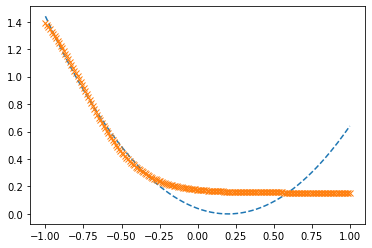

In [ ]:
# Test the FNN
#x = np.array([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5])
x = np.linspace(-1,1,200)
x2 = x.T
y = (x2-0.2)**2 + np.random.randn(x2.size)*0
W = np.zeros(7)
lr = 0.05
out, loss, W, ite = two_layer(x2,y,lr)

plt.plot(x2,y, '--')
plt.plot(x,out, 'x')
print(W)
# print(loss)

0 :and 0.8559441123812652
100 :and 0.31253608381608283
200 :and 0.29388567393749576
300 :and 0.261339213263371
400 :and 0.210634820703542
500 :and 0.14545017871146493
600 :and 0.08227160898850219
700 :and 0.03926636550696244
800 :and 0.01829547986976007
900 :and 0.01020065266171657
1000 :and 0.007353214746782454
1100 :and 0.00625460295305541
1200 :and 0.005692204561945825
1300 :and 0.005302319200287747
1400 :and 0.004982732757362745
1500 :and 0.004704118377337378
1600 :and 0.004456397830748928
1700 :and 0.004234565598848352
1800 :and 0.004035135925298949
1900 :and 0.003855277794952954
2000 :and 0.0036925889176076827
2100 :and 0.003545011501374598
2200 :and 0.003410778867779829
2300 :and 0.003288371380341161
2400 :and 0.003176478432960519
2500 :and 0.003073966020550397
2600 :and 0.002979849439145816
2700 :and 0.0028932704794708856
2800 :and 0.0028134784286841306
2900 :and 0.0027398142419918564
3000 :and 0.0026716973306535395
3100 :and 0.002608614503143796
3200 :and 0.0025501106783403183

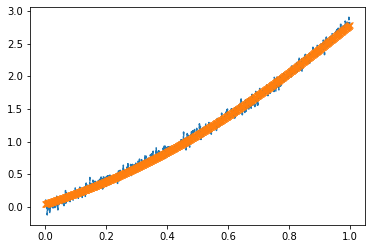

In [ ]:
x = np.linspace(0, 1,1001).T
y = np.sin(x)+x+(x)**3+0.05*np.random.randn(x.size)
out, loss,W, ite = two_layer(x,y,lr=1e-1)
plt.plot(x,y,'--')
plt.plot(x,out, 'x')
# print(out)
print(loss)


0 :and 0.3984497083902025
100 :and 0.15775213456751086
200 :and 0.15668378661184482
300 :and 0.15543735716569573
400 :and 0.1539092397524641
500 :and 0.15198596535681252
600 :and 0.14954262572354723
700 :and 0.14644466541509202
800 :and 0.14255373237043426
900 :and 0.13773794900819575
1000 :and 0.13188624607044994
1100 :and 0.12492559436320716
1200 :and 0.11683945737827768
1300 :and 0.10768564702520465
1400 :and 0.09761141147154201
1500 :and 0.08686214690890462
1600 :and 0.07577773128569891
1700 :and 0.06476938795248136
1800 :and 0.0542736882886168
1900 :and 0.04468991703144562
2000 :and 0.03631793543392765
2100 :and 0.029317464791763236
2200 :and 0.02370179146964354
2300 :and 0.019363915106534742
2400 :and 0.016121077324668387
2500 :and 0.013760751931425891
2600 :and 0.012076295606598229
2700 :and 0.010888127201611652
2800 :and 0.010052079965647474
2900 :and 0.009459069714156033
3000 :and 0.009030229635862034
3100 :and 0.00871053371760126
3200 :and 0.008462655734541028
3300 :and 0.008

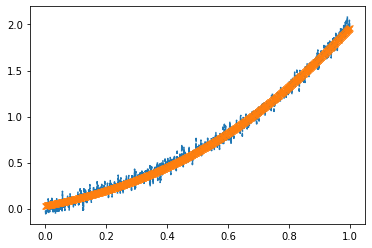

In [ ]:
x = np.linspace(0, 1,1001).T
y = x+(x)**3+0.05*np.random.randn(x.size)
out, loss,W, ite = two_layer(x,y,lr=5e-2)
plt.plot(x,y,'--')
plt.plot(x,out, 'x')
# print(out)
print(loss)